In [96]:
import tensorflow as tf

# 查看GPU是否可以使用
tf.test.is_gpu_available()

# 查看設備CPU與GPU
tf.config.list_physical_devices()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 讀取資料

In [12]:
from tensorflow.keras.datasets import mnist
from collections import Counter

In [13]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11501568/11490434 [==============================] - 16s 1us/step


In [98]:
import os
from collections import Counter
# path = os.getcwd()
x_train = os.listdir('good')
x_train_1 = os.listdir('bad1')
x_train_2 = os.listdir('bad2')
x_train_3 = os.listdir('bad3')
x_train_image = x_train+x_train_1+x_train_2+x_train_3
y_train_label = [0]*len(x_train)+[1]*len(x_train_1)+[2]*len(x_train_2)+[3]*len(x_train_3)
print(y_train_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [99]:
import cv2
import numpy as np

w, h, c = 224, 224, 3
x_train = np.empty((len(x_train_image),h, w, c), dtype=np.uint8)

for i in range(len(x_train_image)):
    if y_train_label[i] == 0:
        img = cv2.imread("good/"+x_train_image[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
    if y_train_label[i] == 1:
        img = cv2.imread("bad1/"+x_train_image[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
    if y_train_label[i] == 2:
        img = cv2.imread("bad2/"+x_train_image[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
    if y_train_label[i] == 3:
        img = cv2.imread("bad3/"+x_train_image[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
        
    x_train[i,:,:,:] = img

In [100]:
print("訓練集的類別數量：%s" %Counter(y_train_label))
print("訓練集的維度：", x_train.shape)
#print("測試集的類別數量：%s" %Counter(y_test_label))
#print("測試集的維度：", x_test.shape)

訓練集的類別數量：Counter({2: 68, 1: 58, 0: 27, 3: 23})
訓練集的維度： (176, 224, 224, 3)


## 繪製影像

In [101]:
import matplotlib.pyplot as plt

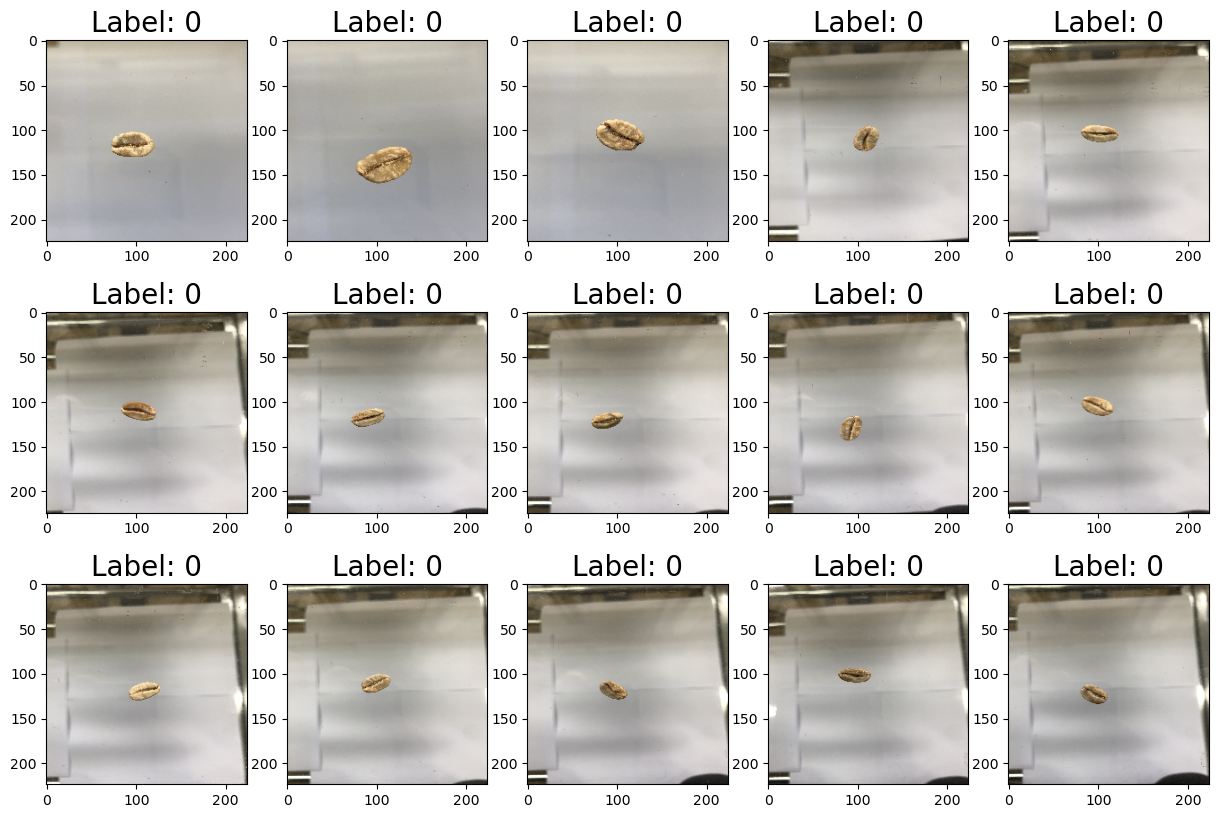

In [102]:
plt.figure(figsize=(15, 10))
for i in range(15):
    ax = plt.subplot(3, 5, 1+i)
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title("Label: %s" %(y_train_label[i]), size=20)
plt.show()

## 資料前處理

In [103]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [104]:
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)

print(y_train_label[0])
print(y_train[0])

0
[1. 0. 0. 0.]


In [105]:
x_train = x_train.astype('float32')/255
#x_train = np.expand_dims(x_train, -1)
#x_test = x_test_image.astype('float32')/255
#x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(176, 224, 224, 3)


## 建立模型

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [79]:
cnn = Sequential()
cnn.add(Conv2D(32, (4,4), activation='relu', padding='same', input_shape=(250,250,3)))
#cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(16, (2,2), activation='relu', padding='same'))

cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(4, activation='sigmoid'))

In [80]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 250, 250, 32)      1568      
                                                                 
 conv2d_7 (Conv2D)           (None, 250, 250, 64)      18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 250, 250, 32)      18464     
                                                                 
 conv2d_9 (Conv2D)           (None, 250, 250, 16)      2064      
                                                                 
 flatten_3 (Flatten)         (None, 1000000)           0         
                                                                 
 dense_6 (Dense)             (None, 32)                32000032  
                                                                 
 dense_7 (Dense)             (None, 4)                

In [81]:
print("模型參數量:", cnn.count_params())

模型參數量: 32040756


In [158]:
import tensorflow.keras.applications as keras_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
base_model = keras_model.MobileNetV3Small(include_top=False, weights="imagenet",
                                     input_shape=(224, 224, 3), pooling=None, classes=4)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x) ; x = Dense(512, activation="relu")(x)
output = Dense(4, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                            

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_100 (ReLU)               (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_100[0][0]']              
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_58[0][0]',            
 /Mul (Multiply)                                                  'tf.math.multiply_88[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_92 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_95[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_63[0][0]']            
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_96 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_99 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_119 (ReLU)               (None, 7, 7, 288)    0           ['tf.__operators__.add_99[0][0]']
                                                                                                  
 tf.math.multiply_99 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_119[0][0]']              
 a)                                                                                               
                                                                                                  
 multiply_66 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 2D)                                                                                              
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   83088       ['expanded_conv_9/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
          

 e/Conv_1 (Conv2D)                                               /Relu[0][0]']                    
                                                                                                  
 tf.__operators__.add_106 (TFOp  (None, 1, 1, 576)   0           ['expanded_conv_10/squeeze_excite
 Lambda)                                                         /Conv_1[0][0]']                  
                                                                                                  
 re_lu_126 (ReLU)               (None, 1, 1, 576)    0           ['tf.__operators__.add_106[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.multiply_106 (TFOpLamb  (None, 1, 1, 576)   0           ['re_lu_126[0][0]']              
 da)                                                                                              
          

* 比較序列型與函數型差別

In [82]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()
'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nmodel = Sequential()\nmodel.add(Dense(64, input_shape=(784,)))\nmodel.add(Dense(10, activation='softmax'))\nmodel.summary()\n"

In [83]:
'''
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
inputs = Input(shape=(784,))
x = Dense(64)(inputs)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()
'''

"\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Dense, Input\ninputs = Input(shape=(784,))\nx = Dense(64)(inputs)\noutputs = Dense(10, activation='softmax')(x)\nmodel = Model(inputs=inputs, outputs=outputs)\nmodel.summary()\n"

## 定義編譯方法

In [146]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [159]:
#cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 使用自定義的學習速率，設為0.0001
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [160]:
# 可視化訓練過程
tensorboard = TensorBoard(log_dir="my_log")

# 模型檢查點
#model_checkpoint = ModelCheckpoint(filepath="weight.{epoch:02d}-{val_acc:.4f}.h5", monitor="val_acc", save_best_only=True, verbose=0)
model_checkpoint = ModelCheckpoint(filepath="weight.{epoch:02d}-{acc:.4f}.h5", monitor="acc", save_best_only=True, verbose=0)

In [161]:
history = model.fit(x=x_train, y=y_train, 
                  batch_size=16, epochs=100, 
                  verbose=1, shuffle=True, 
                  callbacks=[tensorboard, model_checkpoint])

Epoch 1/100
11/11 [==============================] - 4s 126ms/step - loss: 1.3254 - acc: 0.4205
Epoch 2/100
11/11 [==============================] - 1s 123ms/step - loss: 0.9252 - acc: 0.6364
Epoch 3/100
11/11 [==============================] - 1s 126ms/step - loss: 0.7492 - acc: 0.6932
Epoch 4/100
11/11 [==============================] - 1s 116ms/step - loss: 0.5610 - acc: 0.7557
Epoch 5/100
11/11 [==============================] - 1s 123ms/step - loss: 0.4524 - acc: 0.7784
Epoch 6/100
11/11 [==============================] - 1s 115ms/step - loss: 0.4655 - acc: 0.8068
Epoch 7/100
11/11 [==============================] - 2s 209ms/step - loss: 0.3442 - acc: 0.8352
Epoch 8/100
11/11 [==============================] - 1s 70ms/step - loss: 0.3707 - acc: 0.8466
Epoch 9/100
11/11 [==============================] - 0s 46ms/step - loss: 0.3187 - acc: 0.8409
Epoch 10/100
11/11 [==============================] - 1s 85ms/step - loss: 0.2850 - acc: 0.8807
Epoch 11/100
11/11 [======================

11/11 [==============================] - 2s 38ms/step - loss: 0.1430 - acc: 0.8977
Epoch 87/100
11/11 [==============================] - 1s 39ms/step - loss: 0.1262 - acc: 0.9034
Epoch 88/100
11/11 [==============================] - 0s 43ms/step - loss: 0.1137 - acc: 0.9261
Epoch 89/100
11/11 [==============================] - 1s 85ms/step - loss: 0.1290 - acc: 0.8920
Epoch 90/100
11/11 [==============================] - 1s 66ms/step - loss: 0.1329 - acc: 0.9205
Epoch 91/100
11/11 [==============================] - 1s 142ms/step - loss: 0.1289 - acc: 0.8807
Epoch 92/100
11/11 [==============================] - 2s 212ms/step - loss: 0.1299 - acc: 0.9091
Epoch 93/100
11/11 [==============================] - 5s 498ms/step - loss: 0.1201 - acc: 0.9091
Epoch 94/100
11/11 [==============================] - 2s 224ms/step - loss: 0.1114 - acc: 0.9261
Epoch 95/100
11/11 [==============================] - 0s 42ms/step - loss: 0.1267 - acc: 0.8977
Epoch 96/100
11/11 [=============================

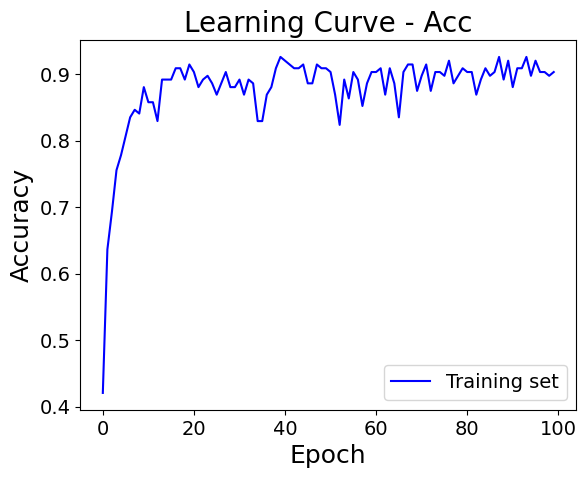

In [162]:
acc = history.history['acc']
loss = history.history['loss']
#val_acc = history.history['val_acc']
#val_loss = history.history['val_loss']
plt.title("Learning Curve - Acc", fontsize=20)
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.plot(np.arange(len(acc)), acc,color='b', label="Training set")
#plt.plot(np.arange(len(val_acc)), val_acc,color='r', label="Test set")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.show()

In [163]:
%load_ext tensorboard
%tensorboard --logdir=my_log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 41620), started 1:10:09 ago. (Use '!kill 41620' to kill it.)

In [153]:
from tensorflow.keras.models import load_model 
model = load_model ("weight.47-0.9375.h5")

0.00012389672
0.10606391
0.07550202
0.047644854


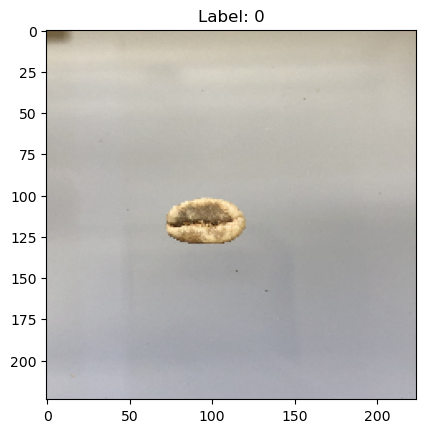

In [154]:
i = 0

result = model.predict(np.expand_dims(x_train[i],0))
print(result[0][0])
print(result[0][1])
print(result[0][2])
print(result[0][3])
plt.imshow(x_train[i])
plt.title("Label: %s" %(y_train_label[i]))
plt.show()

In [164]:
from sklearn.metrics import confusion_matrix
train_predict = model.predict(x_train)

train_predictions = [np.argmax(i) for i in train_predict]
train_cm = confusion_matrix(y_train_label, train_predictions)
print(train_cm)

[[ 0  0 27  0]
 [ 0  0 58  0]
 [ 0  0 68  0]
 [ 0  0 23  0]]


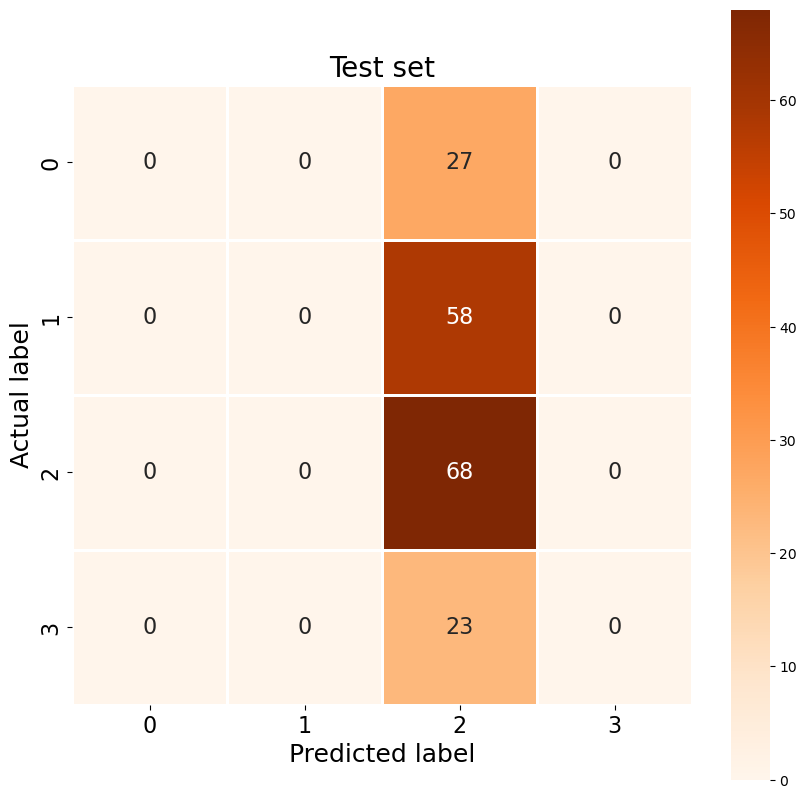

In [165]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Test set', size = 20)
sns.heatmap(train_cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = "Oranges", annot_kws={"size":16})
plt.xlabel('Predicted label', size = 18)
plt.ylabel('Actual label', size = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [166]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print("訓練集的準確度:%0.4f" %(train_acc))
print("訓練集的損失值:%0.4f" %(train_loss))
# test_loss, test_acc = cnn.evaluate(x_test, y_test)
# print("測試集的準確度:%0.4f" %(test_acc))
# print("測試集的損失值:%0.4f" %(test_loss))

6/6 [==============================] - 1s 17ms/step - loss: 10.0347 - acc: 0.3864
訓練集的準確度:0.3864
訓練集的損失值:10.0347


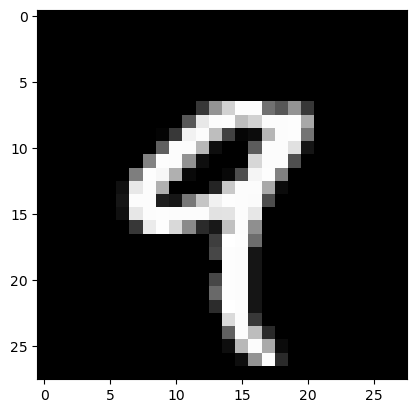

1/1 [==============================] - 0s 301ms/step
[[2.7364280e-08 2.8917272e-08 3.3400801e-07 1.7143967e-06 1.9473004e-05
  1.0487609e-09 2.5311246e-12 2.6959056e-06 1.4070983e-04 9.9983490e-01]]
[9]


In [21]:
import cv2
img = cv2.imread("9.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")
plt.show()
resize_img = np.resize(gray_img, (28, 28))
test_image = resize_img.astype('float32')/255
test_image = np.expand_dims(test_image,-1)
test_image = np.expand_dims(test_image,0)
predict = cnn.predict(test_image)
print(predict)
predictions = [np.argmax(one_hot)for one_hot in predict]
print(predictions)